In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
matches_df = pd.read_csv('matches_updated_mens_ipl.csv')
deliveries_df = pd.read_csv('deliveries_updated_mens_ipl.csv')
ball_df = pd.read_csv('IPL_ball_by_ball_updated.csv')


In [5]:
matches_df.head()
deliveries_df.head()
ball_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#handling missing values 
def missing_values(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['float64', 'int64']:
                df[col] = df[col].fillna(df[col].mean()) 
            else:
                df[col] = df[col].fillna(df[col].mode()[0])
    return df

matches_df = missing_values(matches_df)
deliveries_df = missing_values(deliveries_df)
ball_df = missing_values(ball_df)

In [9]:
print(matches_df.isnull().sum().sum())
print(deliveries_df.isnull().sum().sum())
print(ball_df.isnull().sum().sum())


0
0
487630


In [10]:
print(ball_df.isnull().sum())


match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                          0
noballs                        0
byes                           0
legbyes                        0
penalty                        0
wicket_type                    0
player_dismissed               0
other_wicket_type         243815
other_player_dismissed    243815
dtype: int64


In [11]:
ball_df.drop(columns=['other_wicket_type', 'other_player_dismissed'], inplace=True)


In [12]:
print(ball_df.isnull().sum().sum())  


0


In [20]:
# Task1:Match & Team Performance Analysis
team_matches = pd.concat([matches_df['team1'], matches_df['team2']]).value_counts()

team_wins = matches_df['winner'].value_counts()

win_percentage = (team_wins / team_matches) * 100

# Combine all into one DataFrame for plotting
team_stats_df = pd.DataFrame({
    'Matches Played': team_matches,
    'Matches Won': team_wins,
    'Win %': win_percentage.round(2)
}).fillna(0)

print(team_stats_df)


                             Matches Played  Matches Won  Win %
Chennai Super Kings                     224          131  58.48
Deccan Chargers                          75           29  38.67
Delhi Capitals                           77           38  49.35
Delhi Daredevils                        161           67  41.61
Gujarat Lions                            30           13  43.33
Gujarat Titans                           33           23  69.70
Kings XI Punjab                         190           85  44.74
Kochi Tuskers Kerala                     14            6  42.86
Kolkata Knight Riders                   237          119  50.21
Lucknow Super Giants                     30           17  56.67
Mumbai Indians                          247          157  63.56
Pune Warriors                            46           12  26.09
Punjab Kings                             42           19  45.24
Rajasthan Royals                        206          101  49.03
Rising Pune Supergiant                  

In [19]:
# Standardize team names
matches_df['team1'].replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, inplace=True)
matches_df['team2'].replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, inplace=True)
matches_df['winner'].replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, inplace=True)
matches_df['toss_winner'].replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, inplace=True)


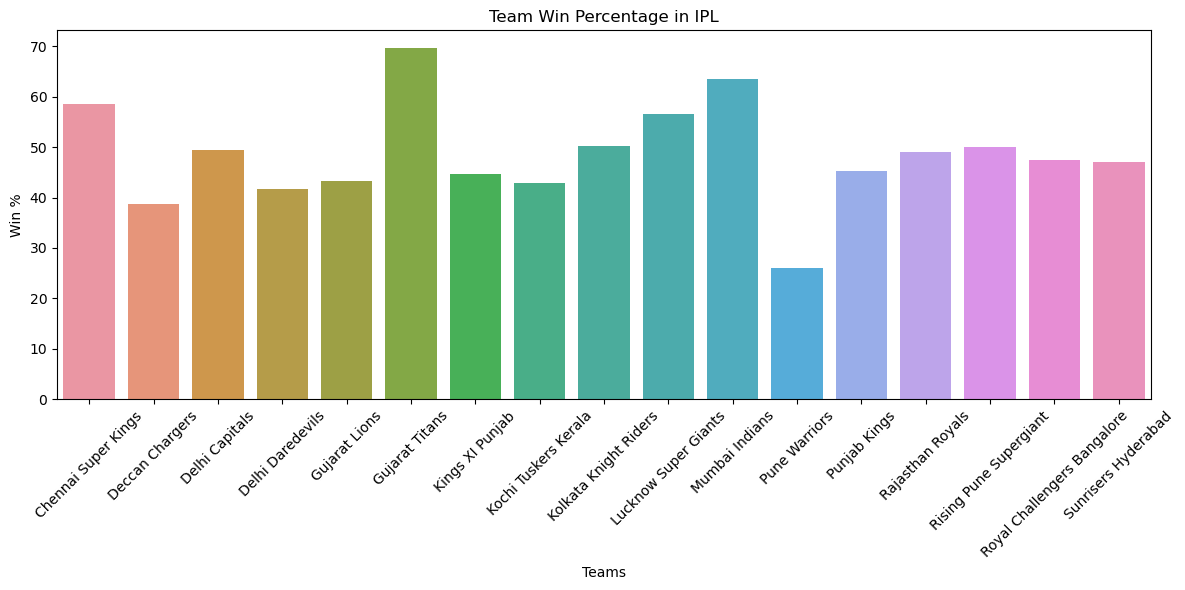

In [21]:
#Barchart for match and team performance
plt.figure(figsize=(12,6))
sns.barplot(x=team_stats_df.index, y=team_stats_df['Win %'])
plt.xticks(rotation=45)
plt.title('Team Win Percentage in IPL')
plt.ylabel('Win %')
plt.xlabel('Teams')
plt.tight_layout()
plt.show()


In [22]:
#Top 3
#Gujarat Titans	69.70%
#Mumbai Indians	63.56%
#Chennai Super Kings	58.48%

#Bottom 3
#Pune Warriors	26.09%
#Deccan Chargers	38.67%
#Gujarat Lions	43.33%

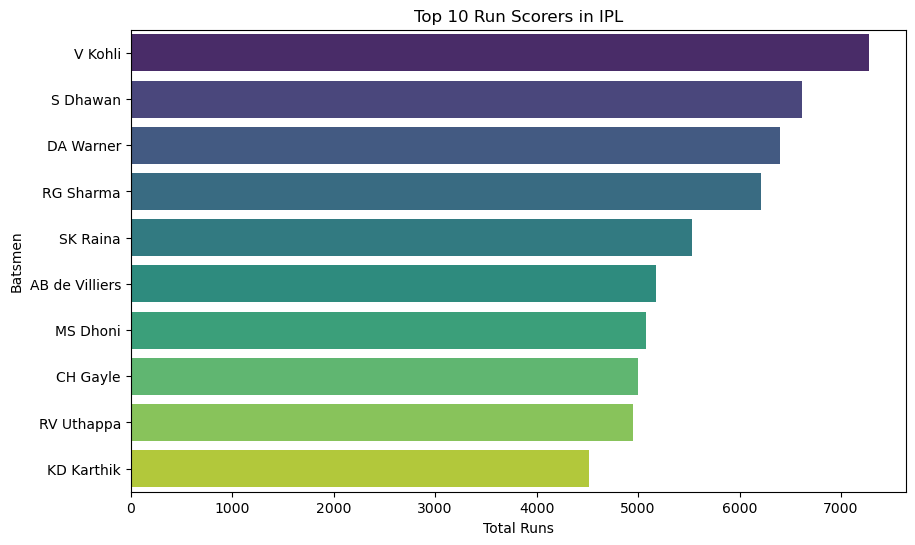

Top Scorer: V Kohli with 7273 runs


In [30]:
#Task 2: Player Statistics & Rankings 

#A.Top Run Scorers
top_batsmen = deliveries_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='viridis')
plt.title('Top 10 Run Scorers in IPL')
plt.xlabel('Total Runs')
plt.ylabel('Batsmen')
plt.show()

top_batsman_name = top_batsmen.index[0]
top_batsman_runs = top_batsmen.iloc[0]
print(f"Top Scorer: {top_batsman_name} with {top_batsman_runs} runs")

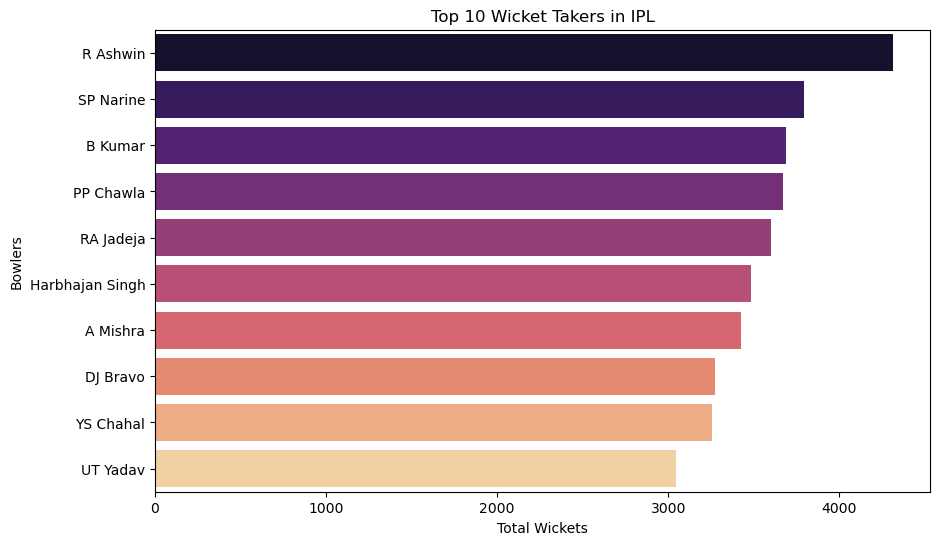

Top Wicket Taker: R Ashwin with 4315 wickets


In [31]:
#B. Top 10 Wicket Takers

valid_dismissals = deliveries_df[deliveries_df['dismissal_kind'].notnull() & 
                                 ~deliveries_df['dismissal_kind'].isin(['run out', 'retired hurt', 'obstructing the field'])]
top_bowlers = valid_dismissals.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='magma')
plt.title('Top 10 Wicket Takers in IPL')
plt.xlabel('Total Wickets')
plt.ylabel('Bowlers')
plt.show()

top_bowler_name = top_bowlers.index[0]
top_bowler_wickets = top_bowlers.iloc[0]
print(f"Top Wicket Taker: {top_bowler_name} with {top_bowler_wickets} wickets")


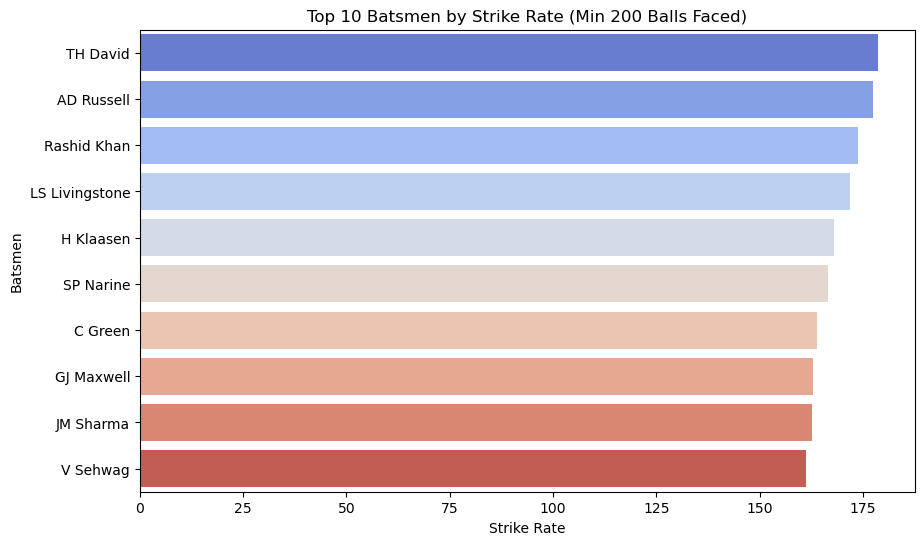

Top Strike Rate: TH David with 178.63


In [32]:
#C. Best Strike rate

runs = deliveries_df.groupby('batsman')['batsman_runs'].sum()
balls_faced = deliveries_df[deliveries_df['extras'] == 0].groupby('batsman').size()

strike_rate_df = pd.DataFrame({
    'Total Runs': runs,
    'Balls Faced': balls_faced
})

strike_rate_df = strike_rate_df[strike_rate_df['Balls Faced'] >= 200]

strike_rate_df['Strike Rate'] = (strike_rate_df['Total Runs'] / strike_rate_df['Balls Faced']) * 100

top_strike_rates = strike_rate_df.sort_values(by='Strike Rate', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_strike_rates['Strike Rate'], y=top_strike_rates.index, palette='coolwarm')
plt.title('Top 10 Batsmen by Strike Rate (Min 200 Balls Faced)')
plt.xlabel('Strike Rate')
plt.ylabel('Batsmen')
plt.show()

top_sr_player = top_strike_rates.index[0]
top_sr_value = top_strike_rates.iloc[0]['Strike Rate']
print(f"Top Strike Rate: {top_sr_player} with {top_sr_value:.2f}")


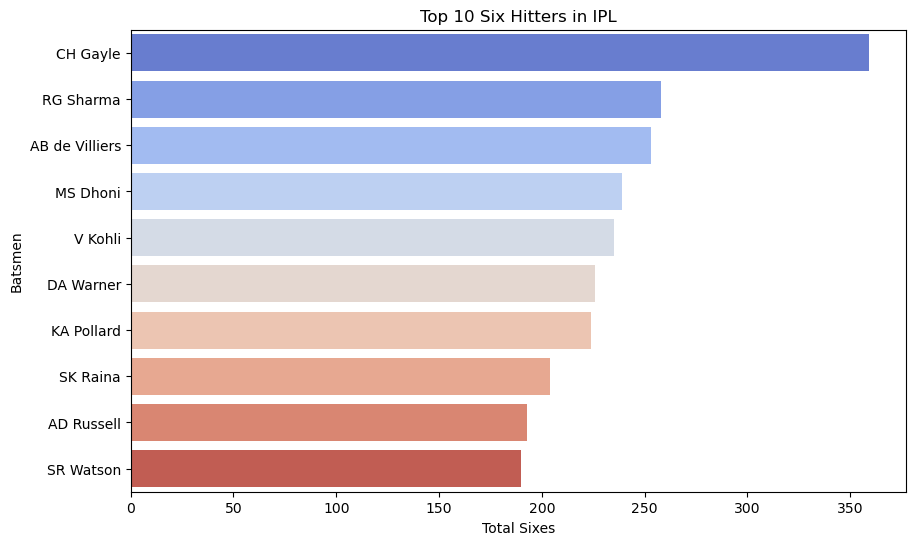

Top Six Hitter: CH Gayle with 359 sixes


In [36]:
#D. Most sixes

sixes = deliveries_df[deliveries_df['batsman_runs'] == 6]
top_six_hitters = sixes['batsman'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_six_hitters.values, y=top_six_hitters.index, palette='coolwarm')
plt.title('Top 10 Six Hitters in IPL')
plt.xlabel('Total Sixes')
plt.ylabel('Batsmen')
plt.show()

top_six_player = top_six_hitters.index[0]
top_six_count = top_six_hitters.iloc[0]
print(f"Top Six Hitter: {top_six_player} with {top_six_count} sixes")


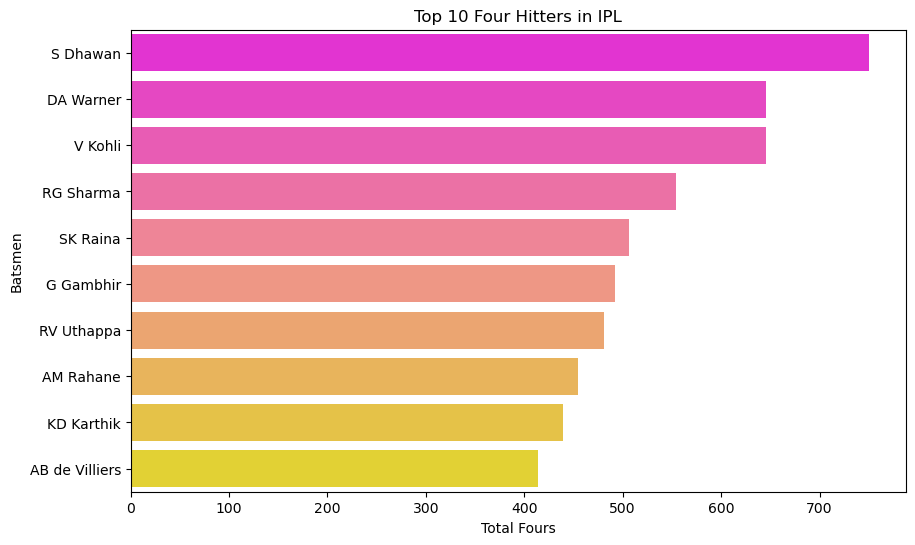

Top Four Hitter: S Dhawan with 750 fours


In [37]:
#E . Most fours

fours = deliveries_df[deliveries_df['batsman_runs'] == 4]
top_four_hitters = fours['batsman'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_four_hitters.values, y=top_four_hitters.index, palette='spring')
plt.title('Top 10 Four Hitters in IPL')
plt.xlabel('Total Fours')
plt.ylabel('Batsmen')
plt.show()

top_four_player = top_four_hitters.index[0]
top_four_count = top_four_hitters.iloc[0]
print(f"Top Four Hitter: {top_four_player} with {top_four_count} fours")


In [38]:
#Task 3: Venue and toss impact

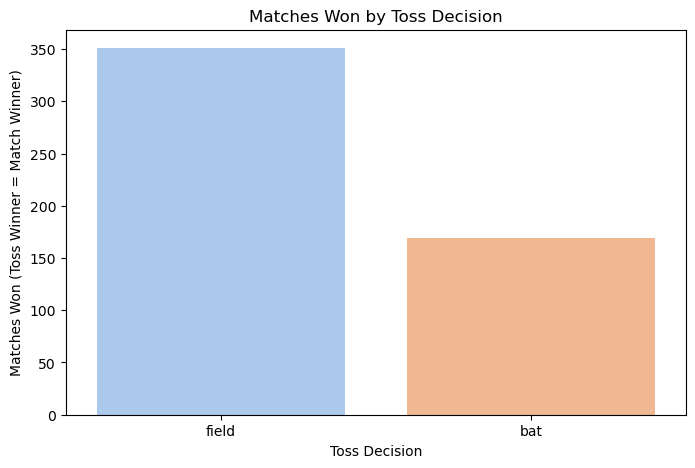

Toss Decision Impact:
 toss_decision
field    351
bat      169
Name: count, dtype: int64


In [41]:
#A .Matches where toss winner also won the match
toss_decision_wins = matches_df[matches_df['toss_winner'] == matches_df['winner']]['toss_decision'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=toss_decision_wins.index, y=toss_decision_wins.values, palette='pastel')
plt.title('Matches Won by Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Matches Won (Toss Winner = Match Winner)')
plt.show()
print("Toss Decision Impact:\n", toss_decision_wins)


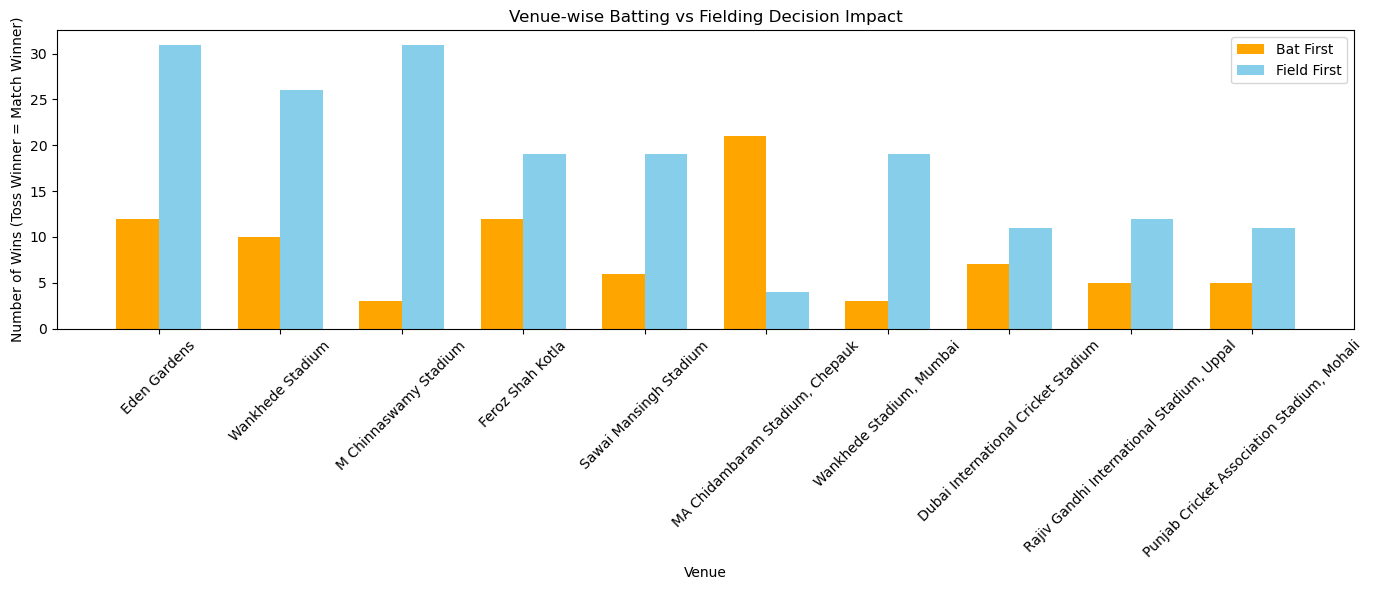

In [64]:
#B .Venue Impact on match outcome

venue_decision_wins = matches_df[matches_df['toss_winner'] == matches_df['winner']]
venue_impact = venue_decision_wins.groupby(['venue', 'toss_decision']).size().unstack().fillna(0)

venue_impact['Total'] = venue_impact.sum(axis=1)
top10_venue_impact = venue_impact.sort_values(by='Total', ascending=False).head(10)

x = np.arange(len(top10_venue_impact))  
width = 0.35  

plt.figure(figsize=(14,6))
plt.bar(x - width/2, top10_venue_impact['bat'], width, label='Bat First', color='orange')
plt.bar(x + width/2, top10_venue_impact['field'], width, label='Field First', color='skyblue')

plt.xticks(x, top10_venue_impact.index, rotation=45)
plt.xlabel('Venue')
plt.ylabel('Number of Wins (Toss Winner = Match Winner)')
plt.title('Venue-wise Batting vs Fielding Decision Impact')
plt.legend()
plt.tight_layout()
plt.show()


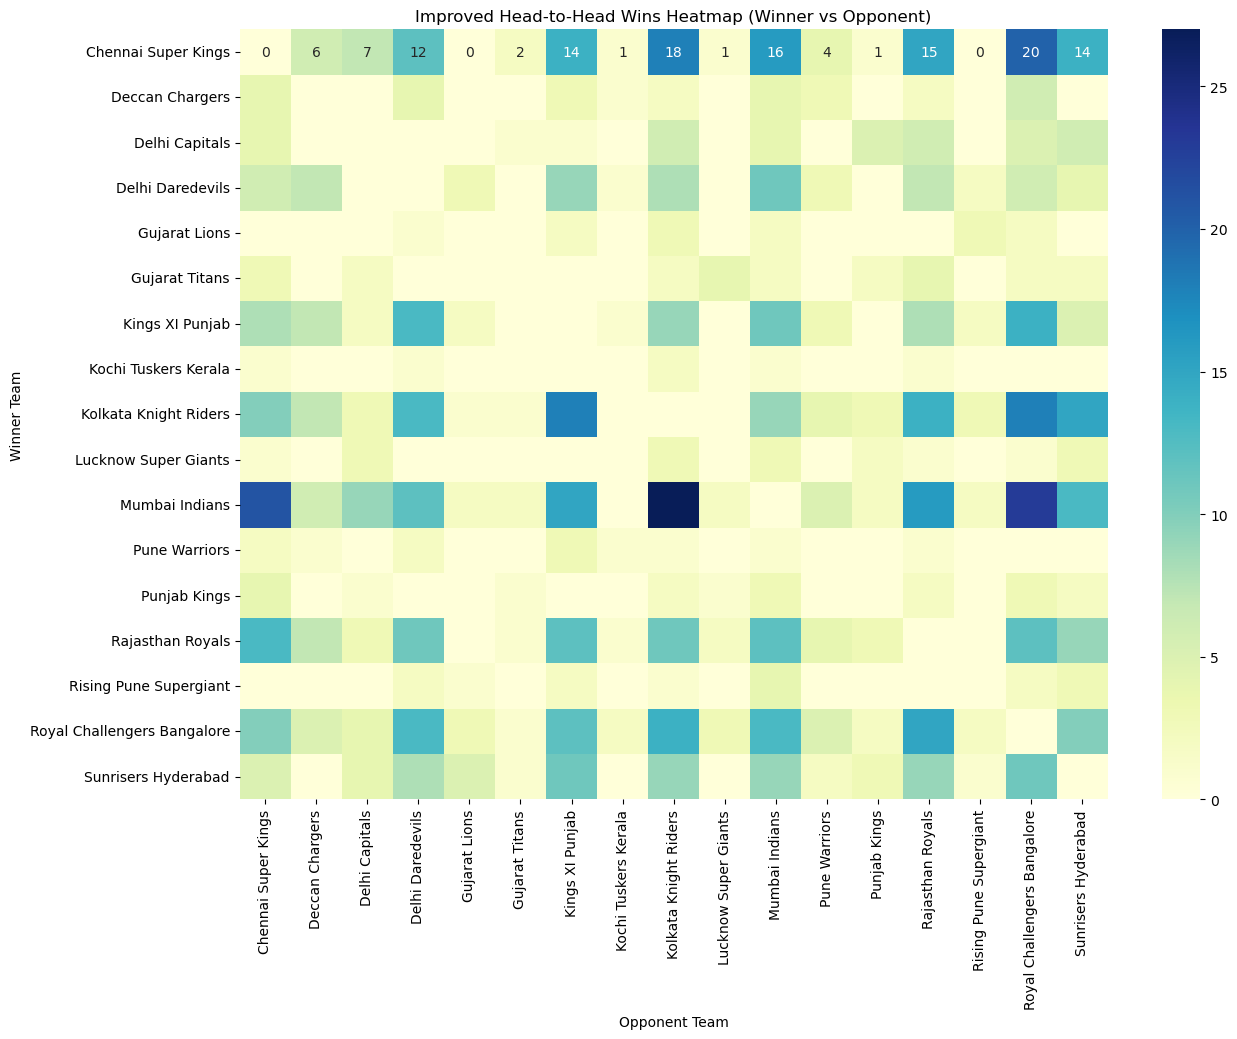

In [51]:
#Task 4:Head to Head Comparison

matches_filtered = matches_df.dropna(subset=['winner'])

head_to_head_data = []

for index, row in matches_filtered.iterrows():
    if row['team1'] == row['winner']:
        opponent = row['team2']
    else:
        opponent = row['team1']
    head_to_head_data.append((row['winner'], opponent))

head_to_head_df = pd.DataFrame(head_to_head_data, columns=['Winner', 'Opponent'])

head_to_head_pivot = head_to_head_df.pivot_table(index='Winner', columns='Opponent', aggfunc=len, fill_value=0)

plt.figure(figsize=(14,10))
sns.heatmap(head_to_head_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Improved Head-to-Head Wins Heatmap (Winner vs Opponent)')
plt.xlabel('Opponent Team')
plt.ylabel('Winner Team')
plt.show()

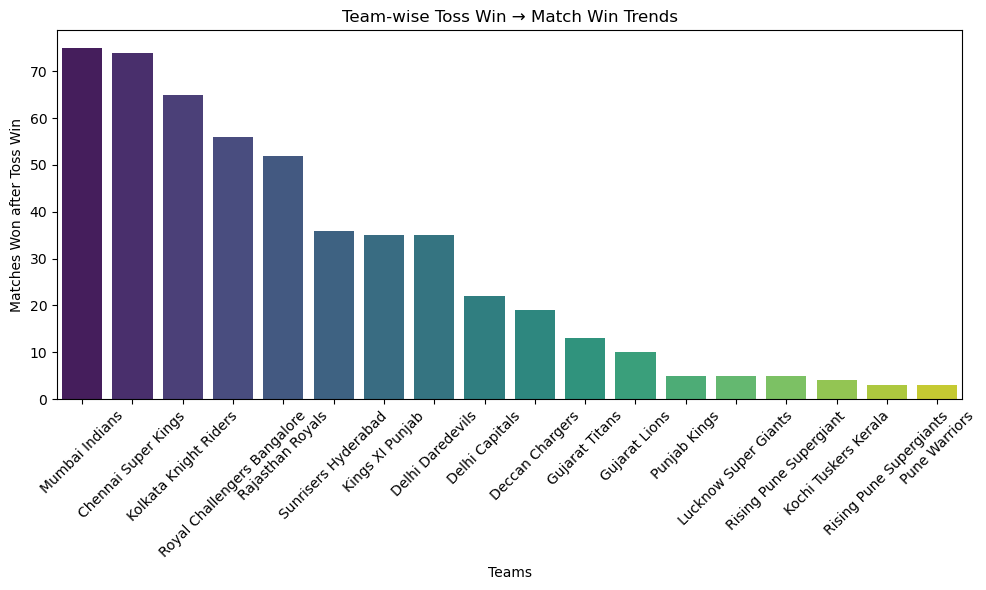

In [53]:
#5 .Win prediction and Trend analysis

#A .Team-wise toss impact
teamwise_toss = matches_df[matches_df['toss_winner'] == matches_df['winner']]
teamwise_impact = teamwise_toss['toss_winner'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=teamwise_impact.index, y=teamwise_impact.values, palette='viridis')
plt.title('Team-wise Toss Win → Match Win Trends')
plt.xticks(rotation=45)
plt.ylabel('Matches Won after Toss Win')
plt.xlabel('Teams')
plt.tight_layout()
plt.show()


In [62]:
#B . Most Consistently Winning Teams
average_wins = season_trend.mean().sort_values(ascending=False)
print(average_wins)




winner
Mumbai Indians                 8.6250
Chennai Super Kings            8.1875
Kolkata Knight Riders          7.4375
Royal Challengers Bangalore    7.1250
Rajasthan Royals               6.3125
Kings XI Punjab                5.3125
Sunrisers Hyderabad            4.8750
Delhi Daredevils               4.1875
Delhi Capitals                 2.3750
Deccan Chargers                1.8125
Gujarat Titans                 1.4375
Punjab Kings                   1.1875
Lucknow Super Giants           1.0625
Gujarat Lions                  0.8125
Pune Warriors                  0.7500
Rising Pune Supergiant         0.6250
Kochi Tuskers Kerala           0.3750
Rising Pune Supergiants        0.3125
dtype: float64


In [63]:
#C .Best Seasons per Team
peak_wins = season_trend.idxmax()
peak_values = season_trend.max()
for team in active_teams:
    print(f"{team}: Highest Wins = {peak_values[team]} in {peak_wins[team]}")


Chennai Super Kings: Highest Wins = 12.0 in 2013
Mumbai Indians: Highest Wins = 13.0 in 2013
Royal Challengers Bangalore: Highest Wins = 10.0 in 2011
Delhi Capitals: Highest Wins = 9.0 in 2019
Rajasthan Royals: Highest Wins = 13.0 in 2007/08
Kolkata Knight Riders: Highest Wins = 12.0 in 2012
Sunrisers Hyderabad: Highest Wins = 11.0 in 2016
Gujarat Titans: Highest Wins = 12.0 in 2022
Lucknow Super Giants: Highest Wins = 9.0 in 2022
Punjab Kings: Highest Wins = 7.0 in 2022


In [5]:
matches_df.to_csv('matches_cleaned.csv', index=False)
deliveries_df.to_csv('deliveries_cleaned.csv', index=False)